In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing and cleaning

In [2]:
automobile_data_processed = pd.read_csv('datasets/automobile_data_processed.csv')

automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964.0
8,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
126,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,8449.0
55,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,6989.0
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0


In [4]:
automobile_data_processed.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

* Selecting few columns to find relationships

In [7]:
automobile_subset = automobile_data_processed[['horsepower', 'city-mpg', 
                                               'highway-mpg', 'price']]

#### Pairplot

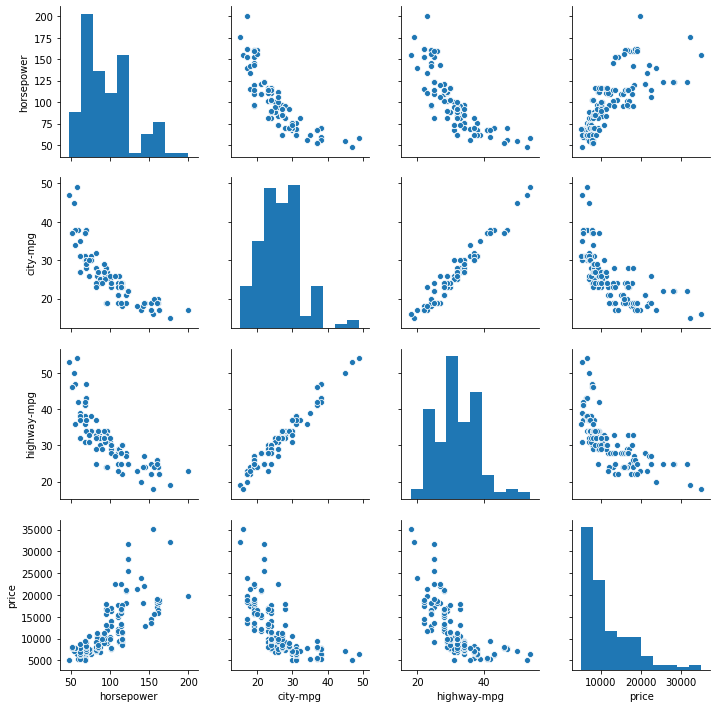

In [8]:
sns.pairplot(automobile_subset)

plt.show()

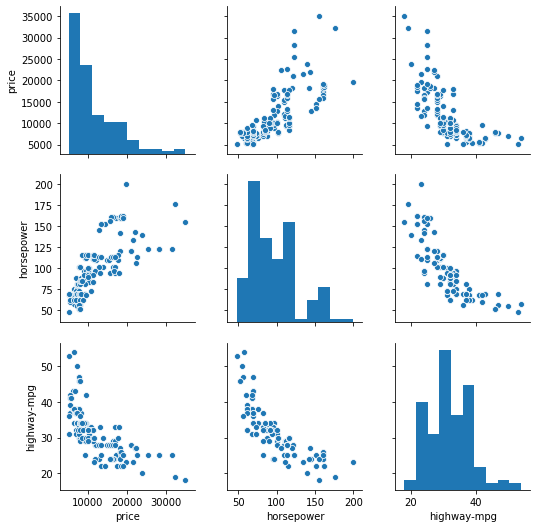

In [29]:
sns.pairplot(automobile_data_processed, 
             vars=['price', 'horsepower', 'highway-mpg'])

plt.show()

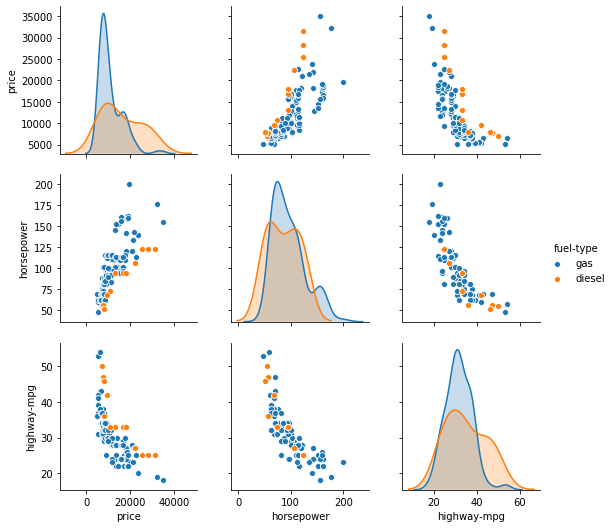

In [9]:
sns.pairplot(automobile_data_processed, 
             vars=['price', 'horsepower', 'highway-mpg'], 
             hue='fuel-type')

plt.show()

#### Pairgrid with diagonal hist

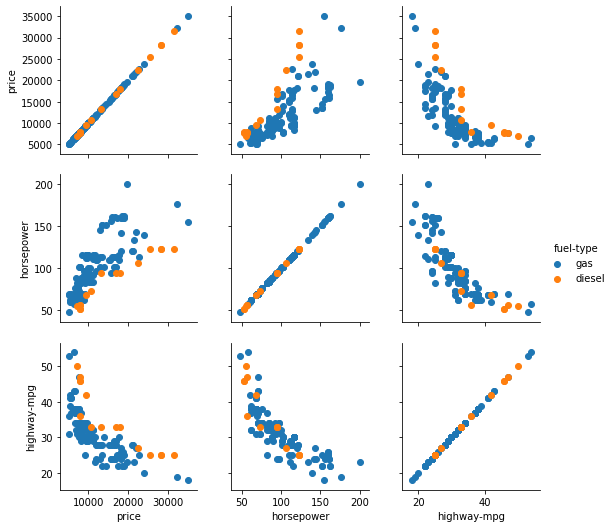

In [23]:
g = sns.PairGrid(automobile_data_processed, 
                 vars=['price', 'horsepower', 'highway-mpg'], 
                 hue='fuel-type')

g.map(plt.scatter)

g.add_legend()

plt.show()

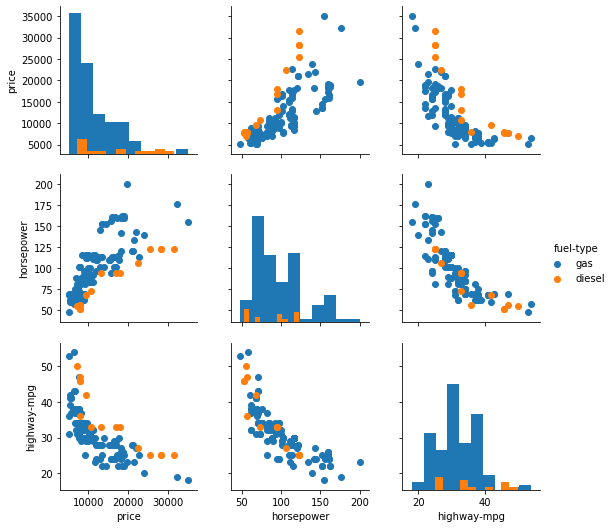

In [24]:
g = sns.PairGrid(automobile_data_processed, 
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.add_legend()

plt.show()

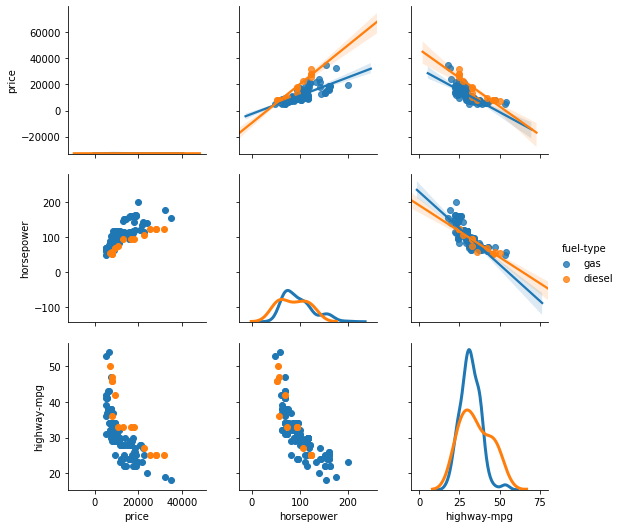

In [28]:
g = sns.PairGrid(automobile_data_processed, 
                 vars=['price', 'horsepower', 'highway-mpg'],
                 hue='fuel-type')


g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_upper(sns.regplot)

g.add_legend()

plt.show()

In [17]:
automobile_data_processed.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [18]:
automobile_corr = automobile_data_processed[['engine-size','horsepower', 
                                             'peak-rpm', 'city-mpg','highway-mpg', 'price']].corr()

automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


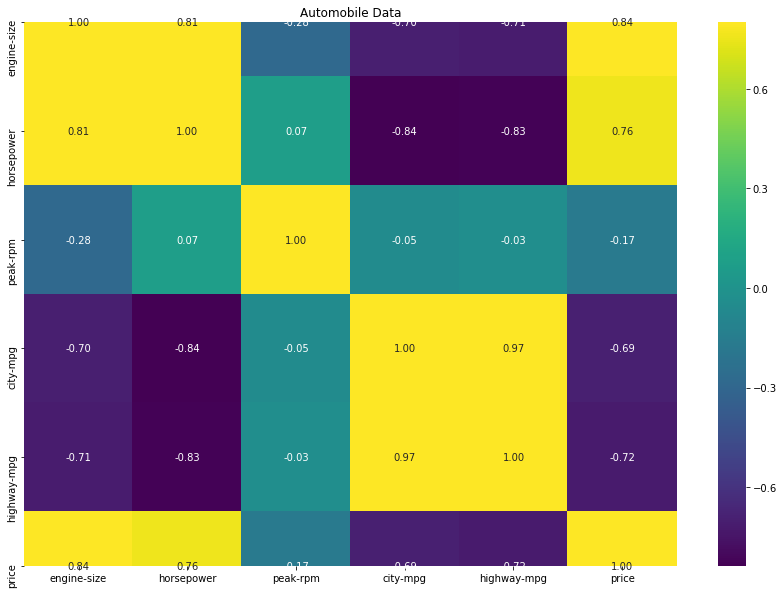

In [19]:
plt.figure(figsize=(15,10))

sns.heatmap(automobile_corr, vmax=.8, square=True, 
            annot=True, fmt='.2f', cmap = 'viridis')

plt.title('Automobile Data')

plt.show()